In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string 
import io
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive

drive.mount('/content/drive')

# Extracting files
fpath = './drive/MyDrive/DLProject/Fake.csv'
rpath = './drive/MyDrive/DLProject/True.csv'
fakedf = pd.read_csv(fpath)
realdf = pd.read_csv(rpath)

Mounted at /content/drive


In [4]:
#Setting target class where 1=real 0=fake
realdf['target'] = 1
fakedf['target'] = 0

#Concatenating both datasets for easier analysis
df = pd.concat([realdf, fakedf], ignore_index=True, sort=False)
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Exploratory Data Analysis

In [ ]:
df.isnull().sum() #checking for null values

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


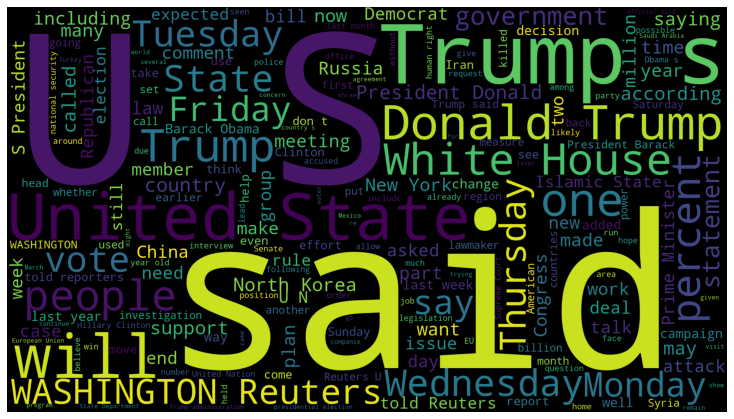

In [ ]:
from wordcloud import WordCloud

realtxt = ' '.join(realdf['text'].tolist())
wordcloud_real = WordCloud(width = 1920, height = 1080,
                background_color ='black',
                min_font_size = 10).generate(realtxt)

#WordCloud Image Real                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud_real)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

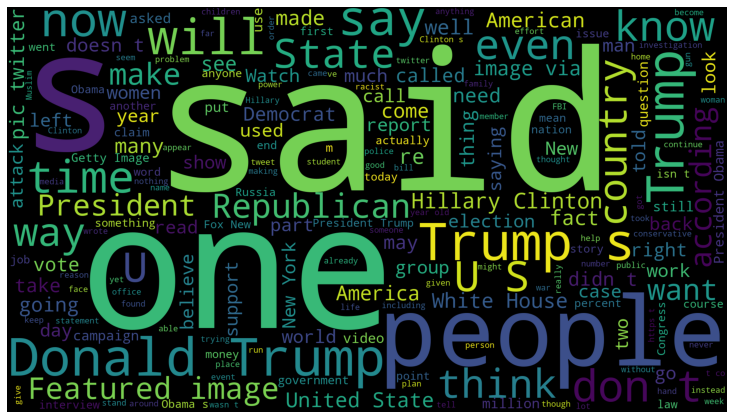

In [ ]:
#WordCloud Image Fake
faketxt = ' '.join(fakedf['text'].tolist())
wordcloud_fake = WordCloud(width = 1920, height = 1080,
                background_color ='black',
                min_font_size = 10).generate(faketxt)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

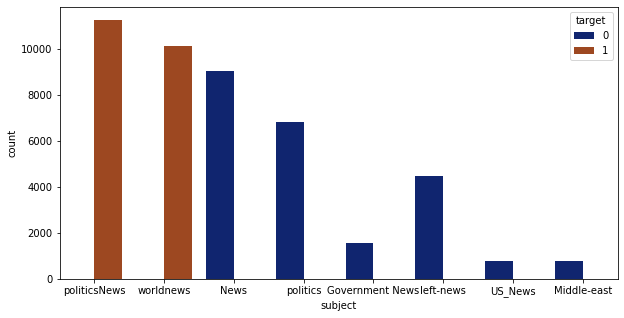

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="subject",  hue='target', data=df, palette="dark")
df.subject.value_counts()

0    23481
1    21417
Name: target, dtype: int64

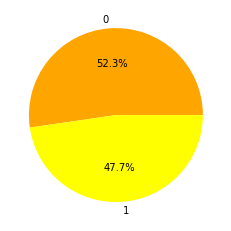

In [ ]:
#Counting fake and real data
plt.pie(df["target"].value_counts().values,
        explode=[0,0],
        labels=df.target.value_counts().index, 
        autopct='%1.1f%%',
        colors=['Orange','Yellow'])
df["target"].value_counts()

Preprocessing

In [5]:
# Removing links and the headline from the date column
df=df[df.date.str.contains("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec")]

In [6]:
# Converting the date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Extracting the year and the month 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 44897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44888 non-null  object        
 1   text     44888 non-null  object        
 2   subject  44888 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   target   44888 non-null  int64         
 5   Year     44888 non-null  int64         
 6   Month    44888 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.7+ MB


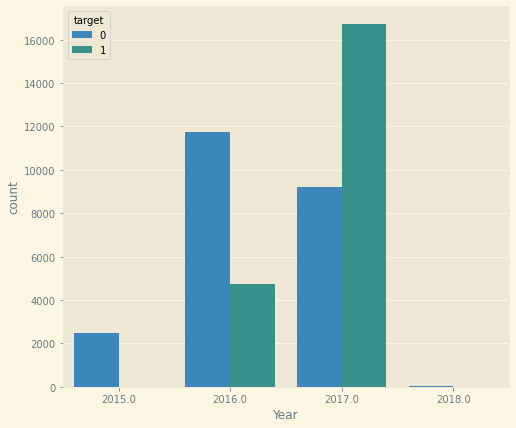

In [ ]:
#Correlation betwwen year and news
plt.style.use('Solarize_Light2')
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='Year', hue='target')

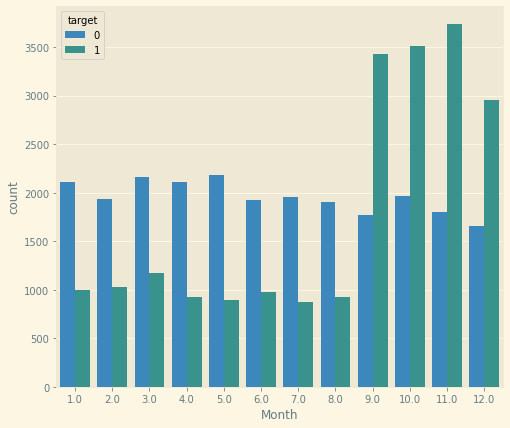

In [ ]:
#Correlation between months and news
plt.style.use('Solarize_Light2')
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='Month', hue='target')

In [7]:
#Duplicating the dataset
clean_news = df.copy()

In [8]:
# Converting to Lowercase - easier analysis
# Removing text in square bracket - as it wont help us determine the truthfulness of the news
# Removing punctuation and numbers - as it wont help us determine the truthfulness of the news
# Pipeline function for basic preprocessing

def preprocessing(text):
    text = str(text).lower()  #lowercase
    text = re.sub('\[.*?\]', '', text) #for text b/w square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #http and html link
    text = re.sub('<.*?>+', '', text) #special characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #stripping punctuation from string
    text = re.sub('\w*\d\w*', '', text) #digits with text
    return text

# Performed using regular expressions

In [9]:
clean_news['title']=clean_news['title'].apply(lambda x:preprocessing(x))
clean_news['text']=clean_news['text'].apply(lambda x:preprocessing(x))
clean_news.tail()

,title,text,subject,date,target
44893,mcpain john mccain furious that iran treated u...,century wire says as reported earlier this w...,Middle-east,2016-01-16,0
44894,justice yahoo settles email privacy classactio...,century wire says it s a familiar theme whene...,Middle-east,2016-01-16,0
44895,sunnistan us and allied ‘safe zone’ plan to ta...,patrick henningsen century wireremember when...,Middle-east,2016-01-15,0
44896,how to blow million al jazeera america finall...,century wire says al jazeera america will go ...,Middle-east,2016-01-14,0
44897,us navy sailors held by iranian military – si...,century wire says as predicted in its new ye...,Middle-east,2016-01-12,0


In [10]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
from nltk.corpus import stopwords 
stop = stopwords.words('english')
clean_news['title'] = clean_news['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#clean_news = [ word for word in clean_news if not word in set(stopwords.words("english"))]
clean_news.tail()

,title,text,subject,date,target
44893,mcpain john mccain furious iran treated us sai...,century wire says reported earlier week unlike...,Middle-east,2016-01-16,0
44894,justice yahoo settles email privacy classactio...,century wire says familiar theme whenever disp...,Middle-east,2016-01-16,0
44895,sunnistan us allied ‘safe zone’ plan take terr...,patrick henningsen century wireremember obama ...,Middle-east,2016-01-15,0
44896,blow million al jazeera america finally calls ...,century wire says al jazeera america go histor...,Middle-east,2016-01-14,0
44897,us navy sailors held iranian military – signs ...,century wire says predicted new year look ahea...,Middle-east,2016-01-12,0


In [12]:
clean_news['allcol'] = clean_news['title'] + ' ' + clean_news['subject'] # merging all columns into one

In [13]:
clean_news.head()

,title,text,subject,date,target,allcol
0,us budget fight looms republicans flip fiscal ...,washington reuters head conservative republica...,politicsNews,2017-12-31,1,us budget fight looms republicans flip fiscal ...
1,us military accept transgender recruits monday...,washington reuters transgender people allowed ...,politicsNews,2017-12-29,1,us military accept transgender recruits monday...
2,senior us republican senator let mr mueller job,washington reuters special counsel investigati...,politicsNews,2017-12-31,1,senior us republican senator let mr mueller jo...
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsNews,2017-12-30,1,fbi russia probe helped australian diplomat ti...
4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tru...,politicsNews,2017-12-29,1,trump wants postal service charge much amazon ...


In [14]:
texts = ' '.join(clean_news['text'])
string = texts.split(" ")
# To peform N-gram analysis, where i is the no. of N-grams you want to analyse
def ngram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head(10))

In [23]:
print("Unigram Analysis")
ngram(string,1)
print("-----------------------")
print(" ")
print("Bigram Analysis")
ngram(string,2)
print("-----------------------")
print(" ")
print("Trigram Analysis")
ngram(string,3)

Unigram Analysis
           word   count
0       (said,)  130029
1      (trump,)  115337
2         (us,)   62805
3      (would,)   54827
4  (president,)   50684
5     (people,)   40512
6        (one,)   35156
7       (also,)   31154
8      (state,)   31015
9        (new,)   30819
-----------------------
 
Bigram Analysis
                    word  count
0        (donald, trump)  20848
1       (united, states)  17892
2         (white, house)  14488
3     (hillary, clinton)   8783
4            (new, york)   8468
5    (president, donald)   6928
6  (washington, reuters)   6493
7           (image, via)   6188
8         (north, korea)   6057
9          (trump, said)   4707
-----------------------
 
Trigram Analysis
                           word  count
0    (president, donald, trump)   5299
1    (president, barack, obama)   2846
2       (us, president, donald)   2590
3     (washington, reuters, us)   2357
4            (donald, j, trump)   2142
5            (new, york, times)   1974
6   (j, t

We observe the news text revolves around United States

In [15]:
# X and y features
y = clean_news['target']
X = clean_news.drop('target', axis=1)

Stemming

It is the process of reducing infected words to their stem.

 Example- 'baked' becomes 'bake'.

In [16]:
from nltk.stem.porter import PorterStemmer
# Pipeline function for stemming
def stemming_process(y):
    first_step = re.sub(r"^[A-Za-z]", ' ', y).lower()
    second_step = first_step.split()
    ps = PorterStemmer()
    result = []
    for w in second_step:
        if w not in stopwords.words('english'):
            result.append(ps.stem(w))
    return ' '.join(result)

In [ ]:
#clean_news['allcol'].apply(stemming_process)

Applying Logistic Regression Model

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# Transforms text to feature vectors that can be used as input to estimator
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Kindly read the text after ValueError

ValueError: ignored

Since we are getting ValueError we convert our features to numpy arrays and then apply TfidVectorizer

In [19]:
X = clean_news['text'].to_numpy()
y = clean_news['target'].to_numpy()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)
# Now the split happens successfuly

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train) #Fitting the data
y_pred = lr.predict(X_test) #Prediction
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score,precision_score, f1_score
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
print("Logistic Regression Performance")
print("Accuracy -", accuracy)
print("Precision -", precision)
print("F1 Score -", f1)

Logistic Regression Performance
Accuracy - 0.9881199881199881
Precision - 0.9894146948941469
F1 Score - 0.9875699192044748


Applying LSTM Model

In [21]:
import keras
import tensorflow
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade
import visualkeras
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-gxya1524
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-gxya1524
     |████████████████████████████████| 989 kB 14.7 MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13449 sha256=065409c902b2a547abcd7fef034636a9c8114fed1e74f45de54ba55cf1825a83
  Stored in directory: /tmp/pip-ephem-wheel-cache-0o2t3iwu/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


In [22]:
#Tokenizing text for sequential model with limits set
X_train, X_test, y_train, y_test = train_test_split(clean_news['text'], clean_news['target'], random_state=6)
tokenizer = text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=250)
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=250)

In [23]:
#Setting values for parameters
batch_size = 199
epochs = 10
embed_size = 100

In [51]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(10000, output_dim=embed_size, input_length=250, trainable=False))

#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 250, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [60]:
lstmfit = model.fit(X_train, y_train, validation_split=0.35, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/10
110/110 [==============================] - 301s 3s/step - loss: 0.3502 - accuracy: 0.8379 - val_loss: 0.2804 - val_accuracy: 0.8802
Epoch 2/10
110/110 [==============================] - 305s 3s/step - loss: 0.2822 - accuracy: 0.8799 - val_loss: 0.1990 - val_accuracy: 0.9206
Epoch 3/10
110/110 [==============================] - 304s 3s/step - loss: 0.1285 - accuracy: 0.9498 - val_loss: 0.0707 - val_accuracy: 0.9703
Epoch 4/10
110/110 [==============================] - 309s 3s/step - loss: 0.0557 - accuracy: 0.9797 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 5/10
110/110 [==============================] - 306s 3s/step - loss: 0.0480 - accuracy: 0.9823 - val_loss: 0.0523 - val_accuracy: 0.9827
Epoch 6/10
110/110 [==============================] - 314s 3s/step - loss: 0.0411 - accuracy: 0.9850 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 7/10
110/110 [==============================] - 308s 3s/step - loss: 0.0360 - accuracy: 0.9866 - val_loss: 0.0352 - val_accuracy: 0.9877

LSTM Model gives an accuracy of 99%

In [62]:
modeleval = model.evaluate(X_test,y_test)
print("Test Accuracy of LSTM model", modeleval)

351/351 [==============================] - 32s 92ms/step - loss: 0.0560 - accuracy: 0.9804
Test Accuracy of LSTM model [0.05595555901527405, 0.9803956747055054]


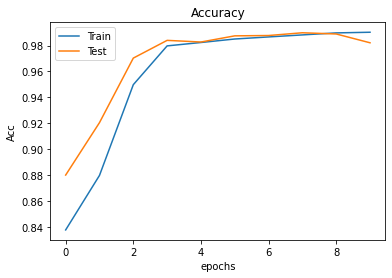

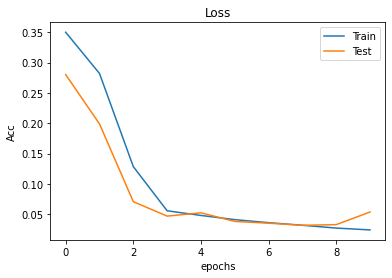

In [63]:
#Plotting Accuracy Curve
plt.figure()
plt.plot(lstmfit.history["accuracy"], label = "Train")
plt.plot(lstmfit.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

#Plotting Loss Curve
plt.figure()
plt.plot(lstmfit.history["loss"], label = "Train")
plt.plot(lstmfit.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

Applying Recurrent Neural Network Model

In [24]:
rnnmodel = Sequential([
    Embedding(10000, 128),
    Bidirectional(LSTM(64,  return_sequences=True)),
    Bidirectional(LSTM(16)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

rnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [26]:
rnnmodel.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tensorflow.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
rnnfit = rnnmodel.fit(X_train, y_train, epochs=10,validation_split=0.25, batch_size=69, shuffle=True)

Epoch 1/10
366/366 [==============================] - 356s 948ms/step - loss: 0.3386 - accuracy: 0.7949 - val_loss: 0.0752 - val_accuracy: 0.9822
Epoch 2/10
366/366 [==============================] - 347s 949ms/step - loss: 0.0512 - accuracy: 0.9902 - val_loss: 0.0727 - val_accuracy: 0.9802
Epoch 3/10
366/366 [==============================] - 348s 950ms/step - loss: 0.0302 - accuracy: 0.9939 - val_loss: 0.0451 - val_accuracy: 0.9887
Epoch 4/10
366/366 [==============================] - 347s 948ms/step - loss: 0.0187 - accuracy: 0.9968 - val_loss: 0.0487 - val_accuracy: 0.9870
Epoch 5/10
366/366 [==============================] - 347s 949ms/step - loss: 0.0119 - accuracy: 0.9983 - val_loss: 0.0510 - val_accuracy: 0.9892
Epoch 6/10
366/366 [==============================] - 344s 940ms/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0510 - val_accuracy: 0.9897
Epoch 7/10
366/366 [==============================] - 346s 946ms/step - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.0518 -

In [27]:
rnnmodeleval = rnnmodel.evaluate(X_test,y_test)
print("Test Accuracy of RNN model", rnnmodeleval)

351/351 [==============================] - 39s 110ms/step - loss: 0.0394 - accuracy: 0.9924
Test Accuracy of RNN model [0.03936756029725075, 0.9924256205558777]


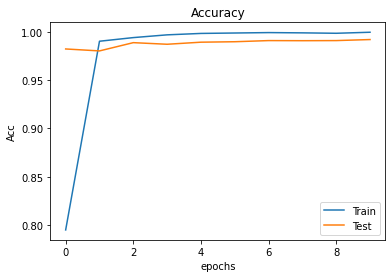

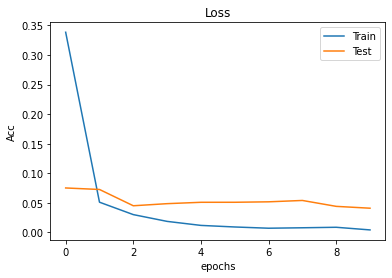

In [28]:
#Plotting Accuracy Curve
plt.figure()
plt.plot(rnnfit.history["accuracy"], label = "Train")
plt.plot(rnnfit.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

#Plotting Loss Curve
plt.figure()
plt.plot(rnnfit.history["loss"], label = "Train")
plt.plot(rnnfit.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

###ANALYSIS

All three models give good accuracy


Logistic Regression gives good accuracy for the fake/real classification task
 
 LSTM - makes it powerful to do forecasting or detecting



Logistic Regression gives an accuracy of 98%
 
 LSTM Model gives an accuracy of 99.02%
 
 RNN gives an accuracy of 99.5%